## N차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

In [1]:
!pip install praw

1.2 라이브러리 설정

In [8]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

In [4]:
#Reddit API 인증
reddit = praw.Reddit(
    client_id='',
    client_secret='',
    user_agent='bumbkie'
)

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [5]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')


2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [6]:
posts_data = []

In [17]:
for post in top_posts:
    posts_data.append({'title': post.title, 'selftext': post.selftext,'created_utc': dt.datetime.fromtimestamp(post.created_utc)})
df = pd.DataFrame(posts_data)

In [18]:
print(df.head())

                                               title  \
0  To all of you who are red this year while the ...   
1  Pelosi's husband buying over $1 million of com...   
2             Beware of what AMC shorts are holding!   
3                      Blackberry -- A Dormant Giant   
4  Wall Street Week Ahead for the trading week be...   

                                            selftext         created_utc  
0  Lately I keep hearing the same old narrative f... 2021-12-30 05:22:17  
1  [Full Article](https://www.msn.com/en-us/tv/ne... 2022-07-20 01:35:45  
2  I understand that most people in this thread i... 2021-06-03 10:12:52  
3  ###**Abbreviation Index:**\n\nBB -- Blackberry... 2021-02-12 10:50:38  
4  Good Sunday morning to all of you here on r/st... 2021-02-21 21:27:32  


2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

In [11]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
import string
import re
def preprocess_text(text):
    text = text.lower() 
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens
df['text'] = df['title']+ ''+ df['selftext']
df['processed_text']= df['text'].apply(preprocess_text)
df = df[['created_utc', 'text', 'processed_text']]
df.rename(columns={'created_utc': 'date'}, inplace=True)
print(df[['date', 'text']].head())

                 date                                               text
0 2021-12-30 05:22:17  To all of you who are red this year while the ...
1 2022-07-20 01:35:45  Pelosi's husband buying over $1 million of com...
2 2021-06-03 10:12:52  Beware of what AMC shorts are holding!I unders...
3 2021-02-12 10:50:38  Blackberry -- A Dormant Giant###**Abbreviation...
4 2021-02-21 21:27:32  Wall Street Week Ahead for the trading week be...


2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

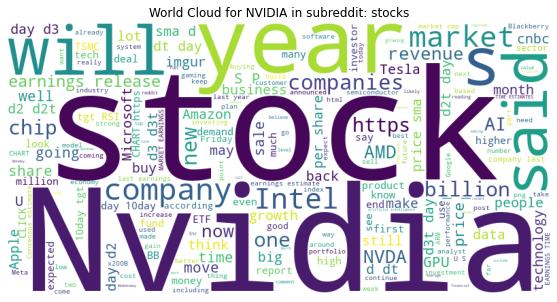

In [20]:
text = ' '.join(df['text'].astype(str))                                                    
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)      


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)                                                                     
plt.title('World Cloud for NVIDIA in subreddit: stocks')                                  
plt.axis('off')                                                                          
plt.show()

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

<Figure size 720x432 with 0 Axes>

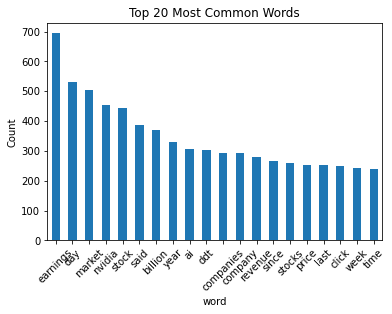

In [21]:
all_words = [word for tokens in df['processed_text'] for word in tokens]
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
df_words = pd.DataFrame(common_words, columns=['word', 'count'])
plt.figure(figsize=(10, 6))
df_words.plot(kind='bar', x='word', y='count', legend=False)
plt.title('Top 20 Most Common Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

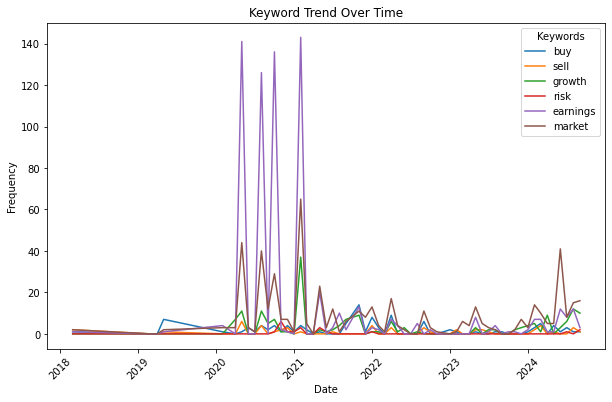

In [28]:
###위에 있는 Reddit 데이터를 쓰겠습니다. 그리고 날짜 정보도 post.created_utc에서 가져와서 그냥 date랑 text 구별한 다음 약간의 전처리를 진행할게요

keywords = ['buy', 'sell', 'growth', 'risk', 'earnings', 'market']
df['date'] = pd.to_datetime(df['date'])

def keyword_trend(df, keywords):
    keyword_counts = {keyword: [] for keyword in keywords}
    grouped = df.groupby(df['date'].dt.to_period('M'))['text'].apply(' '.join)
    for date, text in grouped.items():
        text = re.sub(r'[^a-z\s]', '', text.lower())
        word_counts = Counter(text.split())  
        for keyword in keywords:
            keyword_counts[keyword].append((date.start_time, word_counts.get(keyword, 0)))  
    
    keyword_trend_df = pd.DataFrame(
        {keyword: [count for date, count in counts] for keyword, counts in keyword_counts.items()},
        index=[date for date, count in keyword_counts[keywords[0]]]
    )
    
    return keyword_trend_df


keyword_trend_df = keyword_trend(df, keywords)


plt.figure(figsize=(10, 6))
for keyword in keywords:
    plt.plot(keyword_trend_df.index, keyword_trend_df[keyword], label=keyword)
plt.title('Keyword Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title="Keywords")
plt.xticks(rotation=45)
plt.show()

### 흔히 말하는 "인간지표"를 찾아볼때 좋은 방법인데,"earnings"랑 "market"의 검색 빈도수가 개미들이 시장에 관심이 많을 때 크게 늘어납니다. 보통 시장이 급등하거나 급락할때 이런 반응이 나오고, 급등 급락이후 관심도가 낮아진 1분기 이후가 개인적으로 진입하기 좋은타이밍이라고 생각합니다.
##예를 들어 2,3/4분기에 "market" 검색량이 늘었다가 줄어들었으니, 4/4분기나 25년 극초반이 진입하기 좋을것입니다.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...


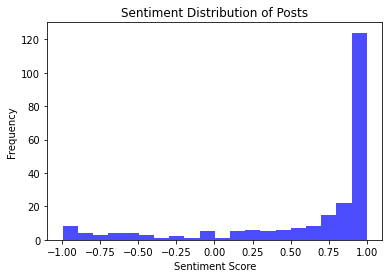

In [30]:
###조금 더 주관적인 요소를 보는 방법인데, vader를 이용한 감성분석입니다. 이 또한 시장과열지수나 개미들의 움직임을 보는데 좋습니다.
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # 긍정(1) ~ 부정(-1)

df['sentiment'] = df['text'].apply(analyze_sentiment)

plt.hist(df['sentiment'], bins=20, color='blue', alpha=0.7)
plt.title('Sentiment Distribution of Posts')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

###보면 레딧에서 NVIDIA에 대해 매우 긍정적인 평가를 보이고 있습니다.
##어떻게 보면 성장 가능성이 매우 높다고 볼수있지만,경험상 급등후 고점에서 호버링하거나 하락하는 주식들이 보통 이랬습니다.
